<a href="https://colab.research.google.com/github/parasjain2426/Speech-Recognition/blob/master/Speech_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Speech Recognition** - This Project is a prototype which can recognise the speech given and spell the word(if word is from training set).
The words on which the model is trained are:
1. Paras
2. HR
3. ThingsGoSocial

**What is an Audio Signal?**
When an object vibrates, the air molecules oscillate to and fro from their rest position and transmits its energy to neighboring molecules. This results in the transmission of energy from one molecule to another which in turn produces a sound wave.

**What is sampling the signal and why is it required? **

An audio signal is a continuous representation of amplitude as it varies with time. Here, time can even be in picoseconds. That is why an audio signal is an analog signal.

Analog signals are memory hogging since they have an infinite number of samples and processing them is highly computationally demanding. Therefore, we need a technique to convert analog signals to digital signals so that we can work with them easily.

**MFCC** - Mel frequency Cepstrum Coefficient (MFCC) feature has been used for designing a text dependent speaker identification system.
MFCC are cepstral coefficients derived on a twisted frequency scale centerd on human auditory perception. In the computation of MFCC, the first thing is windowing the speech signal to split the speech signal into frames.

**About Training Set**:
The training set includes 12 audio files which are around 1.5 s each.
The Audio files have Both male and female voices speaking the words mentioned above.

In [0]:
import librosa
from librosa.feature import mfcc
import numpy as np
import os
sd = []
nsamples = 9000
file_loc = '/content/drive/My Drive/Colab_Examples/Sound'
fdir = os.listdir(file_loc)
for i in fdir:
  loc = '/content/drive/My Drive/Colab_Examples/Sound'+'/'+str(i)
  print(loc)
  sample,sample_rate = librosa.load(loc,sr = 5000)
  sample = np.pad(sample, (nsamples - sample.shape[0], 0), mode='constant')
  print(sample.shape)
  x = mfcc(sample,sr=5000)
  print(x.shape)
  sd.append(x)
sd = np.array(sd)  
print(sd.shape)  

/content/Sound/HR_4.m4a
(9000,)
(20, 18)
/content/Sound/HR_2.m4a
(9000,)
(20, 18)
/content/Sound/Paras_3.m4a
(9000,)
(20, 18)
/content/Sound/TGS_3.m4a
(9000,)
(20, 18)
/content/Sound/Paras_4.m4a
(9000,)
(20, 18)
/content/Sound/TGS_2.m4a
(9000,)
(20, 18)
/content/Sound/Paras_2.m4a
(9000,)
(20, 18)
/content/Sound/TGS_1.m4a
(9000,)
(20, 18)
/content/Sound/HR_1.m4a
(9000,)
(20, 18)
/content/Sound/TGS_4.m4a
(9000,)
(20, 18)
/content/Sound/HR_3.m4a
(9000,)
(20, 18)
/content/Sound/Paras_1.m4a
(9000,)
(20, 18)
(12, 20, 18)


In [0]:
print(librosa.get_duration(sample)) #duration of the sample

0.40816326530612246


In [0]:
# Audio Sample
import IPython.display as ipd
ipd.Audio(sample,rate=5000)

<Figure size 432x288 with 0 Axes>

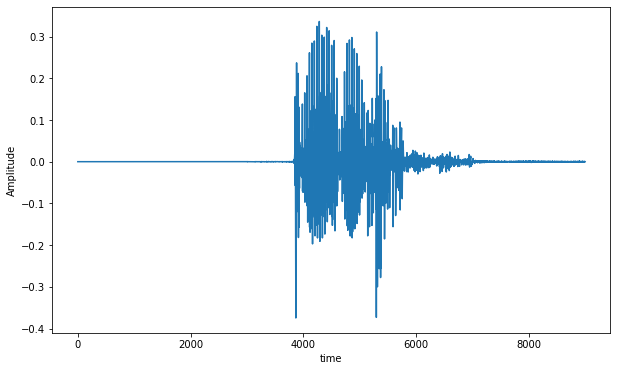

<Figure size 432x288 with 0 Axes>

In [0]:
# Graph plotted against Amplitude vs Time for an audio
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(sample)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.figure()

In [0]:
# Creating Datasets
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
classes = ['HR','HR','Paras','ThingsGoSocial','Paras','ThingsGoSocial','Paras','ThingsGoSocial','HR','ThingsGoSocial','HR','Paras']
lb = LabelEncoder()
y = lb.fit_transform(classes)
y = to_categorical(y,num_classes=3)

In [0]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [0]:
# Creating Model For Training with LSTM Cells and Conv1D Layers.
import tensorflow as tf
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(32,5,strides=1,padding='same',activation='relu',input_shape=[20,18]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(32,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')     
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 32)            2912      
_________________________________________________________________
bidirectional_8 (Bidirection (None, 20, 100)           33200     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 20, 100)           60400     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                128064    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                

In [0]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=["accuracy"])

In [0]:
his = model.fit(sd,y,epochs = 30)

Epoch 1/30
1/1 [==============================] - 0s 2ms/step - loss: 1.1452 - accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 0.9981 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 0.8193 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 1.0000
Epoch 11/30
1/1 [======================

In [0]:
# Saving the Weights
model.save_weights('/content/drive/My Drive/Colab_Examples/speechrecmodel.h5')

**About Prediction**:
The User is asked to record the audio of length 1.5s but not more than 2s and upload the file in Google Drive.Then just run this last cell and see the result.
Note:- The librosa library includes ['aac', 'au', 'flac', 'm4a', 'mp3', 'ogg'] audio file extensions.

**Why accuracy is slightly less ?**
Due to tone change in male and female voices.
If included more training data, the model will work more accurately.

In [0]:
model.load_weights('/content/drive/My Drive/Colab_Examples/speechrecmodel.h5')
xt=[]
floc = '/content/drive/My Drive/Colab_Examples/Sound_test' #audio file directory
fdir = os.listdir(floc)
for i in fdir:
  loc = '/content/drive/My Drive/Colab_Examples/Sound_test'+'/'+str(i) #audio file path
  print(loc)
  sample,sample_rate = librosa.load(loc,sr = 5000)
  sample = np.pad(sample, (nsamples - sample.shape[0], 0), mode='constant')
  # print(sample.shape)
  x = mfcc(sample,sr=5000)
  # print(x.shape)
  xt.append(x)
xt = np.array(xt)  
# print(xt.shape)  
features = model.predict_classes(xt)
print("Predictions Are:")
for i in features:
  print(lb.inverse_transform([i])[0])
print("Real Names:")
print("ThingsGoSocial")
print("Paras")  
print("HR")
print("Paras") 

/content/Sound_test/TGS_t.m4a
/content/Sound_test/Paras_t.m4a
/content/Sound_test/HR_t.m4a
/content/Sound_test/Paras_t0.m4a
Predictions Are:
ThingsGoSocial
Paras
HR
HR
Real Names:
ThingsGoSocial
Paras
HR
Paras
